# Random Forest

In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import ValidationCurve
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.special import logit, expit
from sklearn.preprocessing import QuantileTransformer

In [2]:
Data.columns

NameError: name 'Data' is not defined

In [5]:
d=Data['Risk(45yrs|2ribfx)(%)']/100

C:\Users\ypyas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([-0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

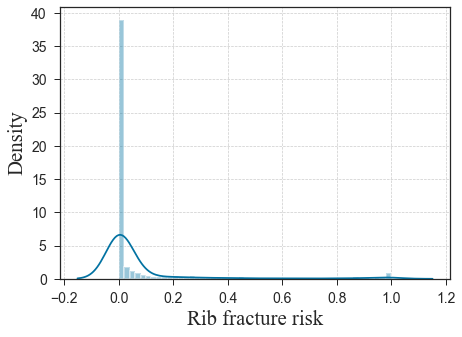

In [6]:
plt.figure(figsize=(7, 5))
plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
sns.distplot(d,hist=True,color='b',hist_kws=dict(edgecolor="white", linewidth=2))
plt.xlabel('Rib fracture risk', fontsize='xx-large',**csfont)
plt.ylabel('Density', fontsize='xx-large',**csfont)
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.savefig('riskinit')

In [2]:
Data=pd.read_csv('1000_maxstrains_upt_logitrisk.csv',sep=';')
X = Data[ Data.columns[1:23]]
y = Data['LOGIT(risk)']

C:\Users\ypyas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([-30., -20., -10.,   0.,  10.,  20.,  30.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

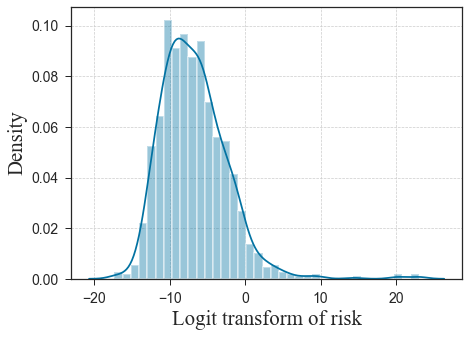

In [7]:
plt.figure(figsize=(7, 5))
plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
sns.distplot(y,hist=True,color='b',hist_kws=dict(edgecolor="white", linewidth=2))
plt.xlabel('Logit transform of risk', fontsize='xx-large',**csfont)
plt.ylabel('Density', fontsize='xx-large',**csfont)
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.savefig('risktrans')
# plt.savefig('R12 rib')

In [3]:
# n_estimators = [160,180]
# max_features = ['auto','sqrt']
# max_depth = [19,20]
# min_samples_split = [3,4]
# min_samples_leaf = [3,4]
# criterion=['mse','mae']
n_estimators = [150,160,175,200]
# max_features = ['auto','sqrt']
max_depth = [5,6,7]
min_samples_split = [4,5,6]
min_samples_leaf = [2,3,4]
# criterion=['mse','mae']
# warm_start=[True,False]
# oob_score=[True,False]
# bootstrap = [True,False]

random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
#                'criterion': criterion,
#                'warm_start': warm_start,
#                'oob_score': oob_score,
#                'bootstrap': bootstrap
              }

In [4]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 150, cv = 10, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X,y)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 108 is smaller than n_iter=150. Running 108 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.1min finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 6, 7],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [4, 5, 6],
                                        'n_estimators': [150, 160, 175, 200]},
                   random_state=42, verbose=2)

In [6]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=6,
                      n_estimators=175)

In [5]:
modo=RandomForestRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=6,
                      n_estimators=200)
# mod = TransformedTargetRegressor(regressor=modo, transformer=QuantileTransformer())
mod = TransformedTargetRegressor(regressor=modo, func=logit,inverse_func=expit)

In [6]:
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [7]:
Data=pd.read_csv('1000_maxstrains_upt_logitrisk.csv',sep=';')
X = Data[ Data.columns[1:23]]
y = Data['LOGIT(risk)']
y=expit(y)
y_actual = []
predict = []
# X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=12)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_mean_absolute_error',train_sizes=[50,150,250,500,750,895])


In [27]:
train_size

array([ 89, 290, 492, 693, 895])

In [9]:
pd.DataFrame((test_mean))

,0
0,0.060850
1,0.055479
2,0.049653
3,0.048950
4,0.047669
5,0.044990


<Figure size 576x396 with 0 Axes>

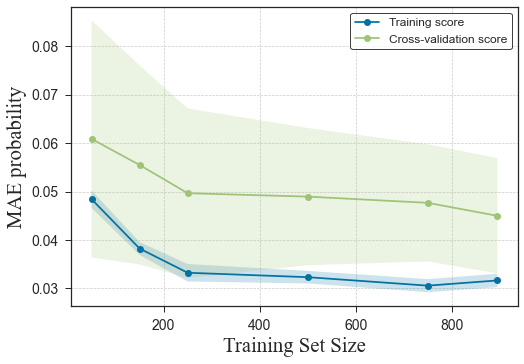

In [8]:

train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size", fontsize='xx-large',**csfont)
plt.ylabel("MAE probability", fontsize='xx-large',**csfont)
leg = plt.legend(frameon=True,loc='best',prop={'size': 12})
leg.get_frame().set_linewidth(1)
leg.get_frame().set_edgecolor('k')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig('rskRFLC', bbox_inches="tight")
plt.show()

In [7]:
X = X.to_numpy()
y = y.to_numpy()


In [8]:
y_Test=y_Test.to_numpy()

In [9]:
kf=cv

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()


Root Mean squared error: 1.657222

Root Mean squared error: 1.632451

Root Mean squared error: 1.992811

Root Mean squared error: 2.401823

Root Mean squared error: 1.779403

Root Mean squared error: 2.277936

Root Mean squared error: 2.157327

Root Mean squared error: 2.321480

Root Mean squared error: 2.124165

Root Mean squared error: 2.507379



In [10]:
ytestunk=HBM_Train.predict(X_Test)
ytestunk=expit(ytestunk)
y_Test=expit(y_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    3.137727
dtype: float64  error mean --->0    0.04708
Name: mean, dtype: float64  error std --->0    0.147725
Name: std, dtype: float64


# train score

In [11]:
ytr=HBM_Train.predict(X)
ytr=expit(ytr)
y=expit(y)
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=np.sqrt((y[u]-ytr[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    3.053048
dtype: float64  error mean --->0    0.033366
Name: mean, dtype: float64  error std --->0    0.101868
Name: std, dtype: float64


In [12]:
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=y[u]-ytr[u]
pd.DataFrame(err).describe()

,0
count,796.000000
mean,0.010033
std,0.106729
min,-0.737937
25%,-0.000451
50%,-0.000001
75%,0.000811
max,0.872660


In [13]:
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=y_Test[u]-ytestunk[u]
pd.DataFrame(err).describe()

,0
count,199.000000
mean,-0.006393
std,0.154950
min,-0.917861
25%,-0.001146
50%,-0.000006
75%,0.000108
max,0.821969


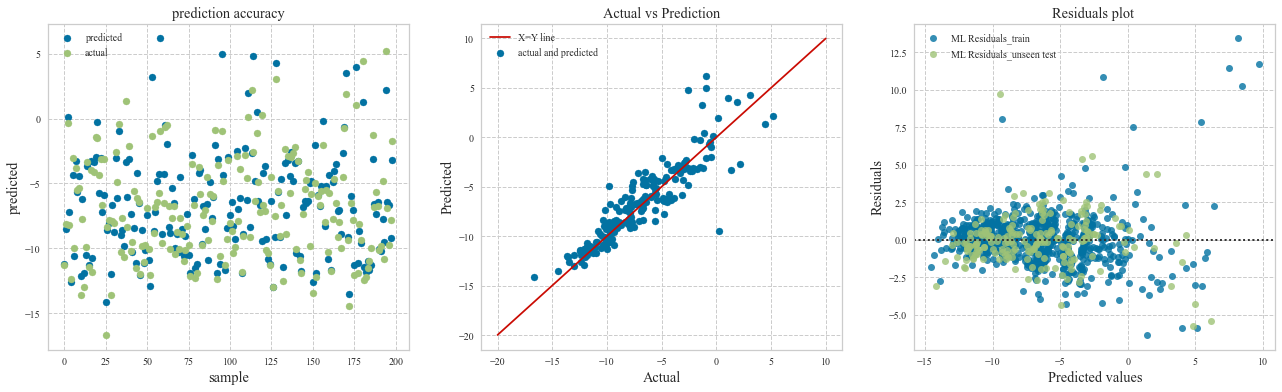

In [12]:
plt.figure(figsize=(22, 6))
csfont = {'fontname':'Times New Roman'}
plt.subplot(1,3,1)
plt.scatter(np.arange(0,len(ytestunk)),ytestunk,label='predicted')
plt.scatter(np.arange(0,len(y_Test)),y_Test,label='actual')
plt.grid( linestyle='--')
plt.title('prediction accuracy', fontsize='large',**csfont)
plt.xlabel('sample', fontsize='large',**csfont)
plt.ylabel('predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,2)
plt.scatter(y_Test,ytestunk,label='actual and predicted')
plt.plot([-20,10],[-20,10],color='r',label='X=Y line')
plt.grid( linestyle='--')
plt.title('Actual vs Prediction', fontsize='large',**csfont)
plt.xlabel('Actual', fontsize='large',**csfont)
plt.ylabel('Predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,3)
a=sns.residplot(y=(y), x=(ytr),label='ML Residuals_train')
r=sns.residplot(y=(y_Test), x=(ytestunk),label='ML Residuals_unseen test')
plt.grid( linestyle='--')
plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='large',**csfont)
plt.ylabel('Residuals', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.show()

# Gradient

In [10]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import ValidationCurve
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.compose import TransformedTargetRegressor

In [11]:
Data=pd.read_csv('1000_maxstrains_upt_logitrisk.csv',sep=';')
X = Data[ Data.columns[1:23]]
y = Data['LOGIT(risk)']

In [49]:
random_grid = {"learning_rate"   : [0.05,0.06,0.065],
             "subsample"        : [0.1,0.2,0.3],
             "n_estimators": [200,250,300],
             'max_depth'        : [2,3,4],
             "max_features"     : ['auto', 'sqrt'],
             "min_samples_split": [0.1,0.15,0.2],
             "min_samples_leaf" : [0.05,0.055,0.06]
             }

In [51]:
rf = GradientBoostingRegressor()
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 400, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,y)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:   59.7s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:  2.0min finished


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_iter=400,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.06, 0.065],
                                        'max_depth': [2, 3, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [0.05, 0.055, 0.06],
                                        'min_samples_split': [0.1, 0.15, 0.2],
                                        'n_estimators': [200, 250, 300],
                                        'subsample': [0.1, 0.2, 0.3]},
                   random_state=42, verbose=2)

In [52]:
rf_random.best_estimator_

GradientBoostingRegressor(learning_rate=0.065, max_depth=4, max_features='auto',
                          min_samples_leaf=0.05, min_samples_split=0.1,
                          n_estimators=300, subsample=0.3)

In [22]:
Data=pd.read_csv('1000_maxstrains_upt_logitrisk.csv',sep=';')
X = Data[ Data.columns[1:23]]
y = Data['LOGIT(risk)']
y=expit(y)

In [23]:
modo=GradientBoostingRegressor(learning_rate=0.065, max_depth=2, max_features='auto',
                          min_samples_leaf=0.05, min_samples_split=0.1,
                          n_estimators=300, subsample=0.7)
mod = TransformedTargetRegressor(regressor=modo,func=logit,inverse_func=expit)

In [24]:
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [25]:
y_actual = []
predict = []
# X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=12)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_mean_absolute_error',train_sizes=[50,150,250,500,750,895])


In [28]:
pd.DataFrame((test_mean))

,0
0,0.060668
1,0.048919
2,0.042904
3,0.039648
4,0.042389
5,0.044188


<Figure size 576x396 with 0 Axes>

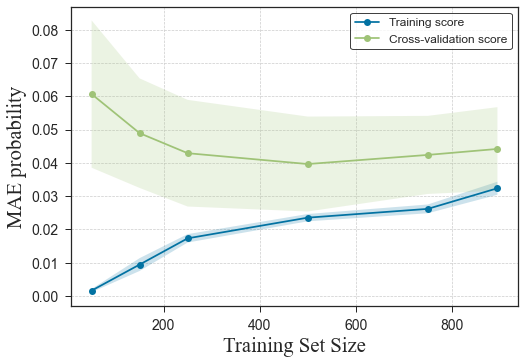

In [26]:

train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
plt.figure()
plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size", fontsize='xx-large',**csfont)
plt.ylabel("MAE probability", fontsize='xx-large',**csfont)
leg = plt.legend(frameon=True,loc='best',prop={'size': 12})
leg.get_frame().set_linewidth(1)
leg.get_frame().set_edgecolor('k')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig('rskGRLC', bbox_inches="tight")
plt.show()
    
# plt.figure()
# plt.subplots(1)
# plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
# plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
# plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
# plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
# plt.xlabel("Training Set Size")
# plt.ylabel("RMS Error")
# plt.legend(loc="best")
# plt.show()

In [19]:
X = X.to_numpy()
y = y.to_numpy()

In [20]:
y_Test=y_Test.to_numpy()

In [21]:
kf=cv
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 1.495632

Root Mean squared error: 1.441253

Root Mean squared error: 1.812561

Root Mean squared error: 2.288666

Root Mean squared error: 1.551648

Root Mean squared error: 1.921365

Root Mean squared error: 2.259887

Root Mean squared error: 2.463621

Root Mean squared error: 1.657102

Root Mean squared error: 2.671066

error COV--->0    1.030801
dtype: float64  error mean --->0    1.091842
Name: mean, dtype: float64  error std --->0    1.125471
Name: std, dtype: float64


In [22]:
ytestunk=HBM_Train.predict(X_Test)
ytestunk=expit(ytestunk)
y_Test=expit(y_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    2.66178
dtype: float64  error mean --->0    0.056685
Name: mean, dtype: float64  error std --->0    0.150883
Name: std, dtype: float64


# train score

In [23]:
ytr=HBM_Train.predict(X)
ytr=expit(ytr)
y=expit(y)
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=np.sqrt((y[u]-ytr[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    3.057456
dtype: float64  error mean --->0    0.029745
Name: mean, dtype: float64  error std --->0    0.090945
Name: std, dtype: float64


In [24]:
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=y[u]-ytr[u]
pd.DataFrame(err).describe()

,0
count,7.960000e+02
mean,-3.362192e-03
std,9.563205e-02
min,-5.872499e-01
25%,-3.495421e-04
50%,-4.698949e-07
75%,3.733396e-04
max,9.356621e-01


In [25]:
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=y_Test[u]-ytestunk[u]
pd.DataFrame(err).describe()

,0
count,199.000000
mean,-0.023936
std,0.159434
min,-0.847183
25%,-0.000845
50%,-0.000005
75%,0.000070
max,0.763038


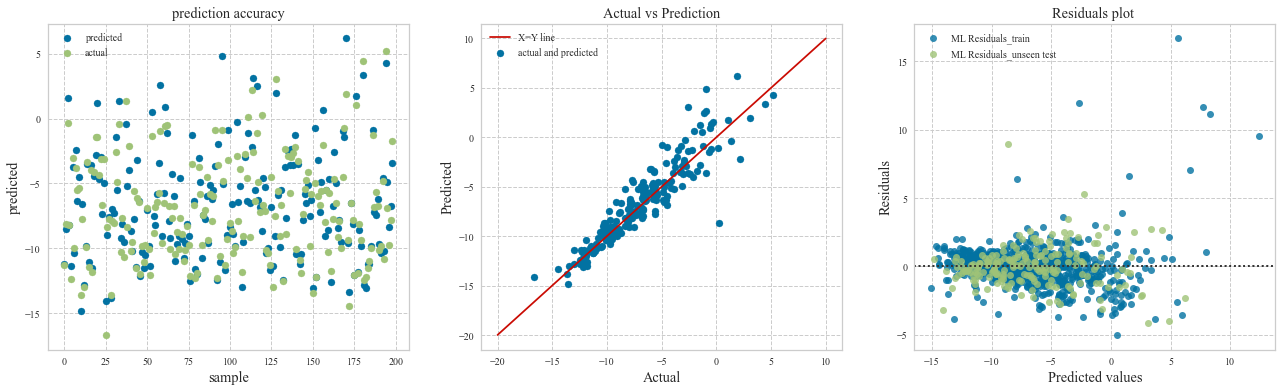

In [45]:
plt.figure(figsize=(22, 6))
csfont = {'fontname':'Times New Roman'}
plt.subplot(1,3,1)
plt.scatter(np.arange(0,len(ytestunk)),ytestunk,label='predicted')
plt.scatter(np.arange(0,len(y_Test)),y_Test,label='actual')
plt.grid( linestyle='--')
plt.title('prediction accuracy', fontsize='large',**csfont)
plt.xlabel('sample', fontsize='large',**csfont)
plt.ylabel('predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,2)
plt.scatter(y_Test,ytestunk,label='actual and predicted')
plt.plot([-20,10],[-20,10],color='r',label='X=Y line')
plt.grid( linestyle='--')
plt.title('Actual vs Prediction', fontsize='large',**csfont)
plt.xlabel('Actual', fontsize='large',**csfont)
plt.ylabel('Predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,3)
a=sns.residplot(y=(y), x=(ytr),label='ML Residuals_train')
r=sns.residplot(y=(y_Test), x=(ytestunk),label='ML Residuals_unseen test')
plt.grid( linestyle='--')
plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='large',**csfont)
plt.ylabel('Residuals', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.show()